# Парная линейная регрессия
## Цель работы
Познакомиться с основными понятиями задачи регрессии и метода градиентного спуска.

## Содержание работы
1. Загрузить данные из тектовых файлов.
2. Создать и построить модель парной линейной регрессии с использованием метода градиентного спуска.
3. Оценить на графике качество построенной модели.
4. Построить кривые обучения.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [3]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

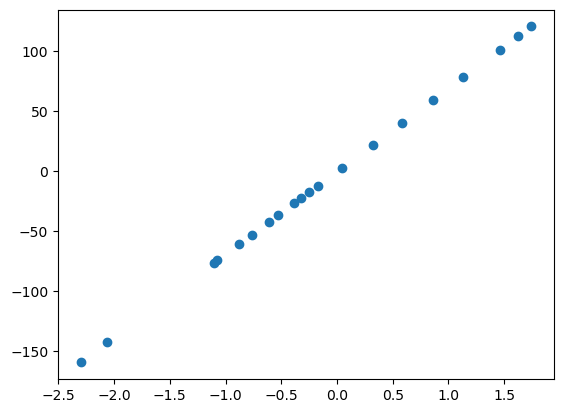

In [4]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [5]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, max_iter=10000):
        self.b0 = 0
        self.b1 = 0
        self.max_iter = max_iter

    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def fit(self, X, Y):
        alpha = 0.5
        errors = [self.error(x, y)]
        for _ in range(self.max_iter):
          dJ0 = sum(self.predict(X) - Y) /len(X)
          dJ1 = sum((self.predict(X) - Y) * X) /len(X)
          self.b0 -= alpha * dJ0
          self.b1 -= alpha * dJ1

          new_error = self.error(x, y)
          old_error = errors[-1]
          if new_error > old_error:
            alpha /= 2
            self.__init__()

          if old_error - new_error < 0.001:
            break

          errors.append(new_error)
        else:
          print("Ошибка!")
        return errors

In [6]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


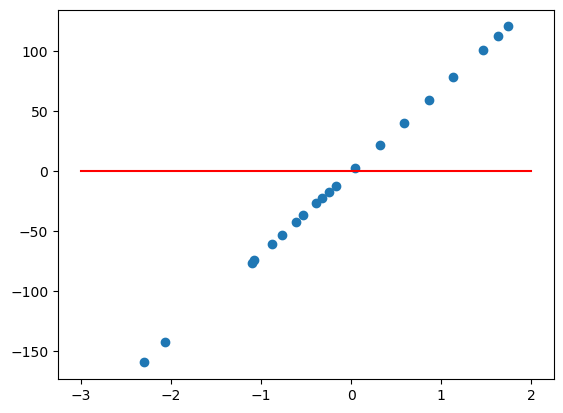

In [7]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [8]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.00035044471700400206


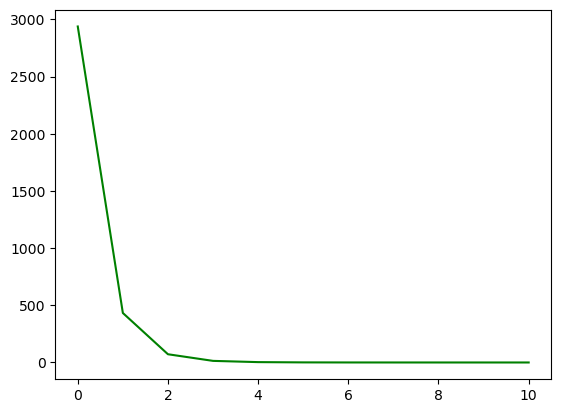

In [9]:
hyp = Model()
errors = hyp.fit(x, y)
plt.plot(errors, 'g')

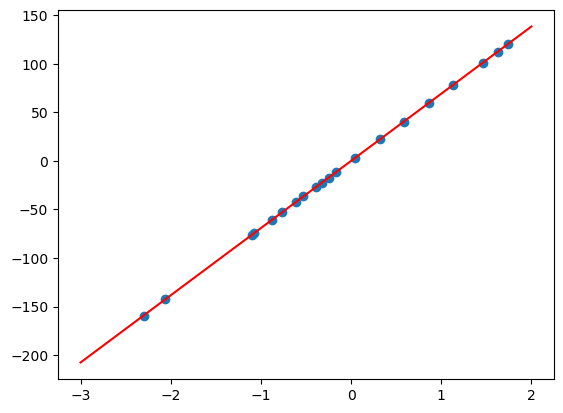

In [10]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

## Задания для самостоятельного выполнения
1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.
2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.
3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.
4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.
5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.
6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.
7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

## Контрольные вопросы

Сформулируйте, в чем состоит задача регрессии, придумайте несколько примеров.

Что такое метод градиентного спуска?

Что такое скорость обучения в методе градиентного спуска?

Какие функции ошибки используются в регрессионных моделях и почему именно такие?

Что показывает конкретное значение ошибки регрессии?

Что показывает график обучения и зачем его строить?


### **1. В чем состоит задача регрессии? Примеры:**

**Задача регрессии** — это предсказание **непрерывного численного значения** на основе входных данных.  
Примеры:
- Предсказание стоимости квартиры по её характеристикам (площадь, район, этаж).
- Прогноз температуры воздуха на завтра.
- Оценка дохода пользователя на основе его данных.
- Прогноз продаж товара по рекламе и времени года.

---

### **2. Что такое метод градиентного спуска?**

**Градиентный спуск** — это численный метод для **поиска минимума функции**.  
В задачах машинного обучения — это способ **минимизировать функцию ошибки**, чтобы подобрать наилучшие параметры модели.  
Он работает так: считаем градиент (направление наибольшего увеличения ошибки) и **двигаемся в противоположную сторону**, делая модель лучше шаг за шагом.

---

### **3. Что такое скорость обучения в градиентном спуске?**

**Скорость обучения (learning rate)** — это **коэффициент, определяющий размер шага**, на который мы сдвигаемся при каждом обновлении параметров.

- Если слишком большая — алгоритм может «перепрыгивать» минимум.
- Если слишком маленькая — обучение будет идти очень медленно.

---

### **4. Какие функции ошибки используются в регрессионных моделях и почему?**

В регрессии чаще всего используют:

- **MSE (Mean Squared Error)** — средняя квадратичная ошибка:  
  — делает большие ошибки **более заметными** за счёт возведения в квадрат.

- **MAE (Mean Absolute Error)** — средняя абсолютная ошибка:  
  — устойчивее к выбросам, но хуже для градиентного спуска (не дифференцируема в 0).

Используют MSE чаще, потому что она дифференцируема и проще для оптимизации.

---

### **5. Что показывает конкретное значение ошибки регрессии?**

Значение ошибки (например, MSE или MAE) показывает **насколько предсказания модели отклоняются от реальных значений**.  
Чем меньше ошибка — тем **лучше модель справляется** с задачей.

Например:  
- MSE = 100 → в среднем отклонение в 10 единиц.
- MAE = 5 → в среднем ошибка на 5 единиц.

---

### **6. Что показывает график обучения и зачем его строить?**

**График обучения** — это визуализация функции ошибки **в зависимости от номера итерации (эпохи)**.  
Он помогает понять:
- **Сходится ли модель** (уменьшается ли ошибка).
- **Не переобучается ли** (если ошибка на обучении ↓, а на валидации ↑).
- **Хорошо ли подобрана скорость обучения**.

 Используется для отладки обучения модели и подбора гиперпараметров.
